In [53]:
import gymnasium as gym
import numpy as np
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from itertools import count
import pandas as pd

import tensorflow as tf
from dqn import DQN, Transition, DataBuffer

env = gym.make("CartPole-v1")

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

In [2]:
state, info = env.reset()
n_observations = len(state)
n_actions = env.action_space.n

In [3]:
#plot cartpole actions against states/other variables
#where does this data come from? 

#run a random agent and see what it does
#use a q-table to choose actions

In [14]:
#agent class

class Agent:
    
    
    def __init__(self, states, actions):
        self.q = {}
        self.memory = []
        self.actions = [a for a in range(actions)]
        self.alpha = 0.8
        self.epsilon = 0.9
        self.epsilon_decay = 0.99
        self.gamma = 0.7
    
    def update(self, state, action, reward, new_value):
        current_q = self.q.get(state)[action] 
        if current_q == 0:
            self.q[state][action] = reward
        else:
            self.set_q(state, action, current_q + self.alpha * (new_value - current_q))
            
    def learn(self, state, action, reward, state2, _):
        max_q = max([self.q.get(state2)[a] for a in self.actions])
        self.update(state, action, reward, reward + self.gamma * max_q)
        
    def batch_rows(self, state, state2, action):
        self.memory.append([state, state2, action])
        
    def act(self, state):
        action = random.choice(self.actions)
            
        return action

In [15]:
n_actions = env.action_space.n
state = env.reset()
n_observations = len(state)

agent = Agent(states=n_observations, actions=n_actions)

episodes = 1
total_steps = 0
total_reward = 0

for episode in range(episodes):
    
    state = env.reset()
    reward = 0
    steps = 0
    done = False
    
    while not done:
        action = agent.act(state) 
        next_state, reward, done, info, _ = env.step(action)
        agent.batch_rows(state, next_state, action)
        state = next_state
        
        steps += 1
        total_reward += reward

    total_steps += steps

In [62]:
df = pd.DataFrame(agent.memory)[1:]
df.rename(columns={0: 'state', 1: 'next_state', 2: 'action'}, inplace=True)
df2 = pd.DataFrame(df['state'].to_list(), columns=['state_var1','state_var2', 'state_var3', 'state_var4'])
df3 = pd.DataFrame(df['next_state'].to_list(), columns=['next_state_var1','next_state_var2', 
                                                        'next_state_var3', 'next_state_var4'])

In [71]:
dfa = pd.concat([df2, df3, df.reset_index()['action']], axis=1)

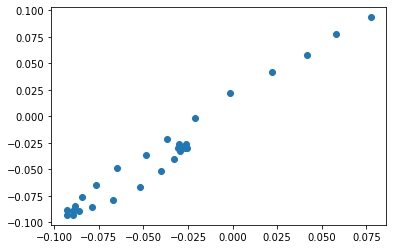

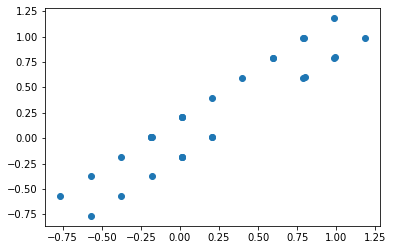

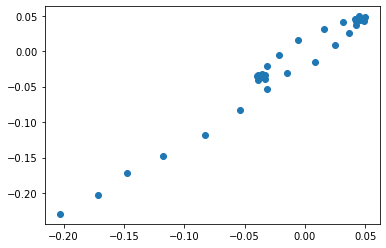

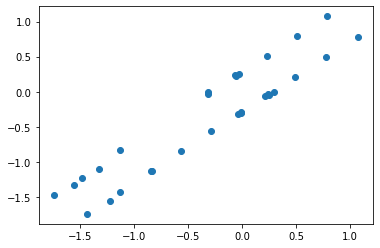

In [75]:
plt.figure()
plt.scatter(dfa['state_var1'], dfa['next_state_var1'])
plt.figure()
plt.scatter(dfa['state_var2'], dfa['next_state_var2'])
plt.figure()
plt.scatter(dfa['state_var3'], dfa['next_state_var3'])
plt.figure()
plt.scatter(dfa['state_var4'], dfa['next_state_var4'])